Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).

Convert text to lowercase and remove punctuaƟon using re.
Tokenize the text into words and sentences.
Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
Remove stopwords (using NLTK's stopwords list).
Display word frequency distribuƟon (excluding stopwords)

In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt_tab')
nltk.download('stopwords')

paragraph = """
The coastal town of Meriden has recently experienced a surge in tourism, thanks to its scenic beaches, historic lighthouse, and vibrant local markets.
Visitors from across the country are drawn to its quiet charm and welcoming community.
In response, local businesses have expanded, introducing eco-friendly cafes, bike rental services, and boutique hotels.
However, the rapid growth has also raised concerns about sustainability, waste management, and the preservation of natural habitats.
Community leaders are now working with environmental groups to ensure that tourism continues without compromising the town’s ecological balance.
"""

# 1. Lowercase and remove punctuation
text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())
print("Cleaned Text:", text_clean)

# 2. Tokenize sentences and words
sent_tokens = sent_tokenize(paragraph)
word_tokens_nltk = word_tokenize(text_clean)
word_tokens_split = text_clean.split()

# 3. Compare split() vs word_tokenize()
print("Split:", word_tokens_split)
print("word_tokenize:", word_tokens_nltk)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens_nltk if word not in stop_words]
print("Filtered Words:", filtered_words)

# 5. Word Frequency Distribution
freq_dist = Counter(filtered_words)
print("Word Frequency:", freq_dist)

Cleaned Text: 
the coastal town of meriden has recently experienced a surge in tourism thanks to its scenic beaches historic lighthouse and vibrant local markets 
visitors from across the country are drawn to its quiet charm and welcoming community 
in response local businesses have expanded introducing ecofriendly cafes bike rental services and boutique hotels 
however the rapid growth has also raised concerns about sustainability waste management and the preservation of natural habitats 
community leaders are now working with environmental groups to ensure that tourism continues without compromising the towns ecological balance

Split: ['the', 'coastal', 'town', 'of', 'meriden', 'has', 'recently', 'experienced', 'a', 'surge', 'in', 'tourism', 'thanks', 'to', 'its', 'scenic', 'beaches', 'historic', 'lighthouse', 'and', 'vibrant', 'local', 'markets', 'visitors', 'from', 'across', 'the', 'country', 'are', 'drawn', 'to', 'its', 'quiet', 'charm', 'and', 'welcoming', 'community', 'in', 're

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Q2. Using the same paragraph from Q1:

Extract all words with only alphabets using re.findall()
Remove stop words using NLTK’s stopword list
Perform stemming with PorterStemmer
Perform lemmaƟzaƟon with WordNetLemmaƟzer
Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over the other

In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# 1. Extract alphabet-only words
words_alpha = re.findall(r'\b[a-zA-Z]+\b', text_clean)

# 2. Remove stopwords again
filtered_alpha = [word for word in words_alpha if word not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_alpha]

# 5. Comparison
print("Stemmed:", stemmed_words)
print("Lemmatized:", lemmatized_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemmed: ['coastal', 'town', 'meriden', 'recent', 'experienc', 'surg', 'tourism', 'thank', 'scenic', 'beach', 'histor', 'lighthous', 'vibrant', 'local', 'market', 'visitor', 'across', 'countri', 'drawn', 'quiet', 'charm', 'welcom', 'commun', 'respons', 'local', 'busi', 'expand', 'introduc', 'ecofriendli', 'cafe', 'bike', 'rental', 'servic', 'boutiqu', 'hotel', 'howev', 'rapid', 'growth', 'also', 'rais', 'concern', 'sustain', 'wast', 'manag', 'preserv', 'natur', 'habitat', 'commun', 'leader', 'work', 'environment', 'group', 'ensur', 'tourism', 'continu', 'without', 'compromis', 'town', 'ecolog', 'balanc']
Lemmatized: ['coastal', 'town', 'meriden', 'recently', 'experienced', 'surge', 'tourism', 'thanks', 'scenic', 'beach', 'historic', 'lighthouse', 'vibrant', 'local', 'market', 'visitor', 'across', 'country', 'drawn', 'quiet', 'charm', 'welcoming', 'community', 'response', 'local', 'business', 'expanded', 'introducing', 'ecofriendly', 'cafe', 'bike', 'rental', 'service', 'boutique', 'hot

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).

Use CountVectorizer to generate the Bag of Words representaƟon.
Use TfidfVectorizer to compute TF-IDF scores.
Print and interpret the top 3 keywords from each text using TF-IDF.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Cats sleep during the day to conserve energy.",
    "Books offer an escape into different worlds.",
    "Bakers start work early to prepare fresh bread.",
    "Drivers face delays due to heavy morning traffic.",
]

# 1. Bag of Words
cv = CountVectorizer()
bow = cv.fit_transform(texts)
print("BoW Features:\n", cv.get_feature_names_out())

# 2. TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

# 3. Top 3 keywords
import numpy as np

for i, text in enumerate(texts):
    scores = tfidf_matrix[i].toarray().flatten()
    top_indices = np.argsort(scores)[-3:][::-1]
    top_words = [tfidf.get_feature_names_out()[j] for j in top_indices]
    print(f"Text {i+1} Top Keywords: {top_words}")

BoW Features:
 ['an' 'bakers' 'books' 'bread' 'cats' 'conserve' 'day' 'delays'
 'different' 'drivers' 'due' 'during' 'early' 'energy' 'escape' 'face'
 'fresh' 'heavy' 'into' 'morning' 'offer' 'prepare' 'sleep' 'start' 'the'
 'to' 'traffic' 'work' 'worlds']
Text 1 Top Keywords: ['the', 'sleep', 'conserve']
Text 2 Top Keywords: ['worlds', 'into', 'offer']
Text 3 Top Keywords: ['work', 'prepare', 'fresh']
Text 4 Top Keywords: ['traffic', 'morning', 'heavy']


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).

Preprocess and tokenize both texts.
Calculate: a. Jaccard Similarity using sets b. Cosine Similarity using TfidfVectorizer + cosine_similarity() c. Analyze which similarity metric gives beƩer insights in your case.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = "Online education is transforming how students learn."
text2 = "E-learning platforms are changing the way students study."

# 1. Preprocess
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return set(word_tokenize(text))

set1, set2 = preprocess(text1), preprocess(text2)

# 2a. Jaccard Similarity
jaccard = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard)

# 2b. Cosine Similarity
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform([text1, text2])
cosine = cosine_similarity(tfidf_vectors[0], tfidf_vectors[1])[0][0]
print("Cosine Similarity:", cosine)

Jaccard Similarity: 0.07142857142857142
Cosine Similarity: 0.07244081925041986


Q5. Write a short review for a product or service.

Use TextBlob or VADER to find polarity & subjecƟvity for each review.
Classify reviews into PosiƟve / NegaƟve / Neutral.
Create a word cloud using the wordcloud library for all posiƟve reviews.

Polarity: 0.5
Subjectivity: 0.65
Sentiment: Positive


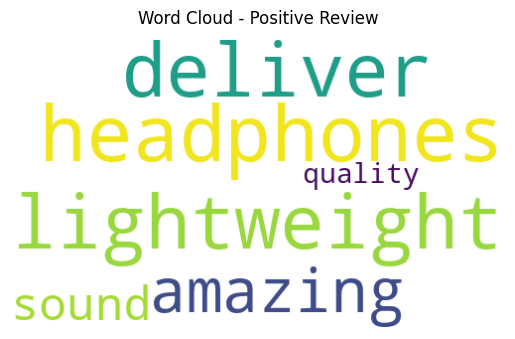

In [8]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "The headphones are lightweight and deliver amazing sound quality."

# 1. Sentiment
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

# 2. Classification
if blob.sentiment.polarity > 0.1:
    sentiment = "Positive"
elif blob.sentiment.polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print("Sentiment:", sentiment)

# 3. WordCloud (for positive reviews)
if sentiment == "Positive":
    wc = WordCloud(width=500, height=300, background_color='white').generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Review")
    plt.show()

Q6. Choose your own paragraph (~100 words) as training data.

Tokenize text using Tokenizer() from keras.preprocessing.text
Create input sequences and build a simple LSTM or Dense model
Train the model and generate 2–3 new lines of text starƟng from any seed word you provide

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
import warnings
warnings.filterwarnings('ignore')

text = """
Climate change continues to be one of the most urgent challenges facing our planet.
Rising temperatures, melting ice caps, and extreme weather events are becoming more frequent.
Governments and organizations around the world are investing in renewable energy and sustainable practices.
Individuals can also make a difference by reducing waste, conserving water, and supporting green initiatives.
Education and awareness play a key role in driving environmental action and policy change.
"""

# 1. Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# 2. Creating n-gram sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram_sequence = words[:i+1]
    sequence = tokenizer.texts_to_sequences([' '.join(n_gram_sequence)])[0]
    input_sequences.append(sequence)

# Padding sequence
max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# 3. Model definition
model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_len - 1),
    LSTM(50),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=0)

# 4. Generate new text
seed = "ai"
for _ in range(5):
    token_seq = tokenizer.texts_to_sequences([seed])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len - 1, padding='pre')
    predicted_probs = model.predict(token_seq, verbose=0)
    predicted_index = np.argmax(predicted_probs)
    next_word = tokenizer.index_word.get(predicted_index, '')
    seed += " " + next_word

print("Generated Text:", seed)

Generated Text: ai change change change change change
